# 🔬 Breast Cancer Prediction using Machine Learning

This project focuses on building a machine learning model to predict whether a breast tumor is **malignant** or **benign** based on various diagnostic features.  
The dataset used is the **Breast Cancer Wisconsin (Diagnostic) Dataset** from `sklearn.datasets`.

## 📌 Objectives
- Understand and preprocess the breast cancer dataset.  
- Perform **exploratory data analysis (EDA)**.  
- Train machine learning models for classification.  
- Evaluate performance using metrics such as **accuracy, precision, recall, and F1-score**.  
- Provide insights on which model performs best.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

📂 Dataset Information

- **Source**: `sklearn.datasets.load_breast_cancer`  
- **Samples**: 569  
- **Features**: 30 numeric features (mean, standard error, and worst values of cell nuclei properties).  
- **Target**:  
  - 0 → Malignant  
  - 1 → Benign  

## 🛠️ Data Preprocessing
Steps followed:
1. **Loading the dataset** using Scikit-learn.  
2. **Converting into a Pandas DataFrame** for easier analysis.  
3. **Checking missing values** and dataset statistics.  
4. **Feature scaling/normalization** (if applied).  
5. **Splitting dataset** into training and testing sets.

In [ ]:
breast_data = sklearn.datasets.load_breast_cancer()
print(breast_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
breast_cancer_data = pd.DataFrame(breast_data.data , columns= breast_data.feature_names)
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer_data['label']= breast_data.target
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
breast_cancer_data.shape

(569, 31)

In [ ]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
breast_cancer_data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
breast_cancer_data['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
breast_cancer_data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X=breast_cancer_data.drop(columns='label' , axis=1)
y=breast_cancer_data['label']

In [ ]:
print(X)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1 , stratify=y , random_state = 42)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(569, 30) (512, 30) (57, 30)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
X_train_std = scalar.fit_transform(X_train)
X_test_std= scalar.fit_transform(X_test)

In [ ]:
print(X_train_std)

[[ 0.25480383  0.65241465  0.23804349 ...  0.25343762  0.42062373
   0.47696213]
 [ 1.6538891   0.22812653  1.60057602 ...  0.71341983 -0.55397506
   0.41334442]
 [-1.03292567  0.13638856 -1.03522395 ... -0.70332538 -0.02381872
  -0.35449371]
 ...
 [-0.84447745 -1.19151857 -0.84842846 ... -1.12771553 -0.51111811
  -0.75832789]
 [-1.20538435  0.0308899  -1.14969817 ... -0.24892328 -0.43810257
   0.05597883]
 [-0.98438598  1.36567738 -0.98191285 ... -0.79381369  0.81109816
  -0.13376791]]


In [ ]:
print(X_test_std)

[[ 0.01525342  0.19360866  0.02939965 ...  1.07224857  3.6675308
   0.94832454]
 [-0.85310255  0.12288447 -0.80427587 ... -0.45365646  0.05928887
  -0.80968731]
 [-0.16168432 -1.01142269 -0.13356244 ...  0.30643477 -0.67520309
   1.04408296]
 ...
 [ 1.56958338  0.04127964  1.49886815 ...  0.37712528  0.25996974
  -1.41578174]
 [-1.34961706 -0.32322194 -1.36220026 ... -1.17099677 -0.94612225
  -0.17486534]
 [-0.25423637 -0.20625502 -0.25357639 ...  0.38049149  1.18912213
   0.12311232]]


## 🤖 Model Building

We train and evaluate multiple machine learning models:
- Logistic Regression  
- Random Forest Classifier  

In [ ]:
lin_model = LogisticRegression()

In [ ]:
lin_model.fit(X_train , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
random_model = RandomForestClassifier()

In [ ]:
random_model.fit(X_train , y_train)

RandomForestClassifier()

## 📈 Model Evaluation

For each model:
- Accuracy Score

In [ ]:
X_data_prediction = lin_model.predict(X_train)
accuracy_on_traning_data = accuracy_score(y_train , X_data_prediction)
print("Accuracy score on traning data is :" , accuracy_on_traning_data)

Accuracy score on traning data is : 0.953125


In [ ]:
X_data_prediction = lin_model.predict(X_test)
accuracy_on_testing_data = accuracy_score(y_test , X_data_prediction)
print("Accuracy score on testing data is :" , accuracy_on_testing_data)

Accuracy score on testing data is : 0.9473684210526315


In [ ]:
random_model.fit(X_train , y_train)
X_data_prediction = random_model.predict(X_train)
accuracy_on_traning_data_ran = accuracy_score(y_train , X_data_prediction)
print("Accuracy score on traning data is :" , accuracy_on_traning_data_ran)

Accuracy score on traning data is : 1.0


In [ ]:
X_data_prediction = random_model.predict(X_test)
accuracy_on_testing_data_ran = accuracy_score(y_test , X_data_prediction)
print("Accuracy score on testing data is :" , accuracy_on_testing_data_ran)

Accuracy score on testing data is : 0.9649122807017544


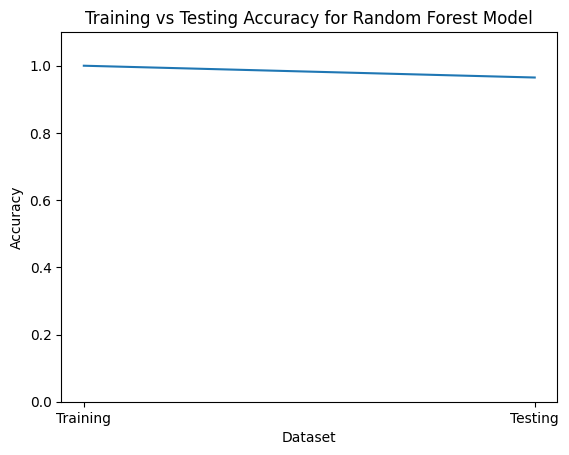

In [ ]:
accuracy_df = pd.DataFrame({
    'Accuracy': [accuracy_on_traning_data_ran, accuracy_on_testing_data_ran],
    'Dataset': ['Training', 'Testing']
})

sns.lineplot(data=accuracy_df, x='Dataset', y='Accuracy')
plt.title('Training vs Testing Accuracy for Random Forest Model')
plt.ylim(0, 1.1)
plt.show()

## ✅ Results & Conclusion

- Best performing model: LogisticRegression  
- Accuracy achieved: **95%**  
- Observations about feature importance and model performance.  
- Possible improvements:
  - Hyperparameter tuning  
  - Feature engineering  
  - Using ensemble methods  


## 🚀 Future Work

- Try deep learning models (e.g., Neural Networks).  
- Apply advanced feature selection methods.  
- Deploy the best model as a **web application** (e.g., using Flask or Streamlit).

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(16 , activation = 'relu'),
    keras.layers.Dense(2 , activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_std , y_train , validation_split=0.1 , epochs = 10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7862 - loss: 0.5090 - val_accuracy: 0.8462 - val_loss: 0.3237
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9228 - loss: 0.2165 - val_accuracy: 0.9038 - val_loss: 0.1788
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9601 - loss: 0.1312 - val_accuracy: 0.9615 - val_loss: 0.1247
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9703 - loss: 0.0965 - val_accuracy: 0.9808 - val_loss: 0.0995
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9796 - loss: 0.0774 - val_accuracy: 0.9808 - val_loss: 0.0853
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9920 - loss: 0.0660 - val_accuracy: 0.9808 - val_loss: 0.0768
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9941 - loss: 0.0583 - val_accuracy: 0.9808 - val_loss: 0.0711
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9941 - loss: 0.0526 - val_accuracy: 0.9808 - val_lo

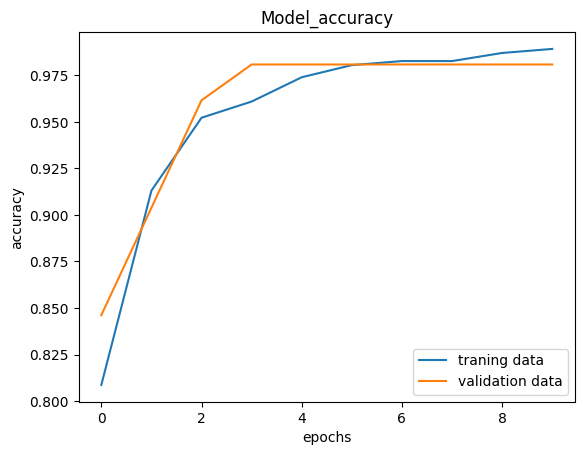

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['traning data' , 'validation data'] , loc ='lower right')

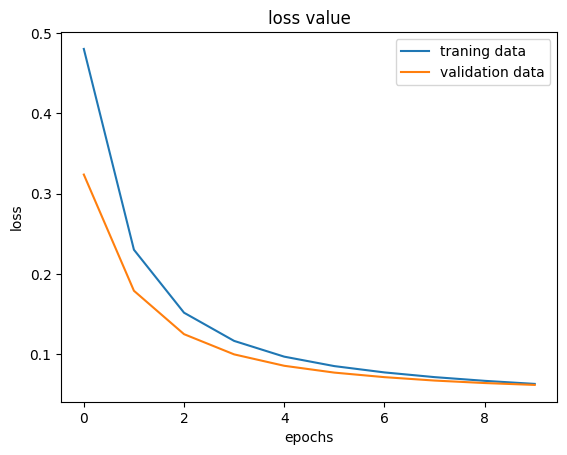

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss value')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['traning data' , 'validation data'] , loc ='upper right')

In [ ]:
accuracy,loss = model.evaluate(X_test_std , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9779 - loss: 0.1158


In [ ]:
print(X_test_std.shape)
print(X_train_std[0])

(57, 30)
[ 0.25480383  0.65241465  0.23804349  0.11944072 -0.81399796 -0.02770581
 -0.25157924 -0.25382634  0.494352   -0.52429133 -0.30383136  0.20662486
 -0.26699223 -0.25521628 -0.85079972  0.14650436  0.0290757   0.03488784
 -0.18858579  0.07958462  0.11059738  0.95641936  0.0961087  -0.01665913
 -1.08108391  0.52296701  0.18209239  0.25343762  0.42062373  0.47696213]


In [ ]:
y_pred = model.predict(X_train_std)
print(y_pred.shape)
print(y_pred[0])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(512, 2)
[0.6334638  0.59932363]


In [ ]:
print(X_test_std)
print(y_pred)

[[ 0.01525342  0.19360866  0.02939965 ...  1.07224857  3.6675308
   0.94832454]
 [-0.85310255  0.12288447 -0.80427587 ... -0.45365646  0.05928887
  -0.80968731]
 [-0.16168432 -1.01142269 -0.13356244 ...  0.30643477 -0.67520309
   1.04408296]
 ...
 [ 1.56958338  0.04127964  1.49886815 ...  0.37712528  0.25996974
  -1.41578174]
 [-1.34961706 -0.32322194 -1.36220026 ... -1.17099677 -0.94612225
  -0.17486534]
 [-0.25423637 -0.20625502 -0.25357639 ...  0.38049149  1.18912213
   0.12311232]]
[[0.6334638  0.59932363]
 [0.9799944  0.09474586]
 [0.03878017 0.8951999 ]
 ...
 [0.00875554 0.98919916]
 [0.05636153 0.9396759 ]
 [0.2574841  0.93232423]]


#Understanding the concept behind the argmax()

* This function is used to print max index of the value
* Using this we are going to convert probability values to labeled values

In [ ]:
my_list = [0.58 , 0.63]
index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.58, 0.63]
1


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0)

#Building predictive system

In [ ]:
input_data=(17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_std = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

prediction_label = ([np.argmax(prediction)])

if (prediction_label[0] == 0):
  print('The tumor is Maligant')
else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
The tumor is Maligant


In [ ]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259
)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_std = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

prediction_label = ([np.argmax(prediction)])

if (prediction_label[0] == 0):
  print('The tumor is Maligant')
else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The tumor is Benign


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
